In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt


In [64]:
df=pd.read_csv('COVID-19 data for GCC countries.csv')
df

,date,Bahrain_new_cases,Bahrain_Mean_Tem,Bahrain_Mean_Dewpoint,Bahrain_Mean_Windspeed,Qatar_new_cases,Qatar_Mean_Temp,Qatar_Mean_Humidity,Qatar_Mean_Dewpoint,Qatar_Mean_Windspeed,...,Oman_new_cases,Oman_Mean_Temp,Oman_Mean_Humidity,Oman_Mean_Dewpoint,Oman_Mean_Windspeed,UAE_new_cases,UAE_Mean_Temp,UAE_Mean_Humidity,UAE_Mean_Dewpoint,UAE_Mean_Windspeed
0,4/17/2020,40,25,53,6,560,25,64,62,5,...,50,27,80,73,6,477,25,69,66,8
1,4/18/2020,33,28,54,9,345,25,67,65,8,...,111,27,74,72,7,0,26,67,67,8
2,4/19/2020,108,25,64,9,440,26,77,71,8,...,86,28,79,76,7,479,30,42,58,7
3,4/20/2020,26,25,60,6,567,27,65,67,8,...,144,30,67,73,7,484,31,39,59,9
4,4/21/2020,66,26,57,6,518,27,59,64,7,...,98,31,47,64,8,490,29,47,62,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,6/17/2021,547,34,63,24,127,37,20,51,18,...,2015,36,52,75,6,2167,33,63,78,10
427,6/18/2021,487,33,63,22,184,36,25,54,16,...,2966,33,76,82,7,1942,33,66,79,8
428,6/19/2021,439,33,65,15,184,35,33,61,12,...,3299,32,75,81,7,2109,34,66,80,8
429,6/20/2021,465,33,70,15,107,34,54,72,10,...,5320,33,74,81,6,1850,37,48,70,8


In [54]:
df.isnull().sum()

Bahrain_new_cases         0
Bahrain_Mean_Tem          0
Bahrain_Mean_Dewpoint     0
Bahrain_Mean_Windspeed    0
Qatar_new_cases           0
Qatar_Mean_Temp           0
Qatar_Mean_Humidity       0
Qatar_Mean_Dewpoint       0
Qatar_Mean_Windspeed      0
KSA_new_cases             0
KSA_Mean_Temp             0
KSA_Mean_Humidity         0
KSA_Mean_Dewpoint         0
KSA_Mean_Windspeed        0
Kuwait_new_cases          0
Kuwait_Mean_Temp          0
Kuwait_Mean_Humidity      0
Kuwait_Mean_Dewpoint      0
Kuwait_Mean_Windspeed     0
Oman_new_cases            0
Oman_Mean_Temp            0
Oman_Mean_Humidity        0
Oman_Mean_Dewpoint        0
Oman_Mean_Windspeed       0
UAE_new_cases             0
UAE_Mean_Temp             0
UAE_Mean_Humidity         0
UAE_Mean_Dewpoint         0
UAE_Mean_Windspeed        0
dtype: int64

<AxesSubplot:xlabel='date'>

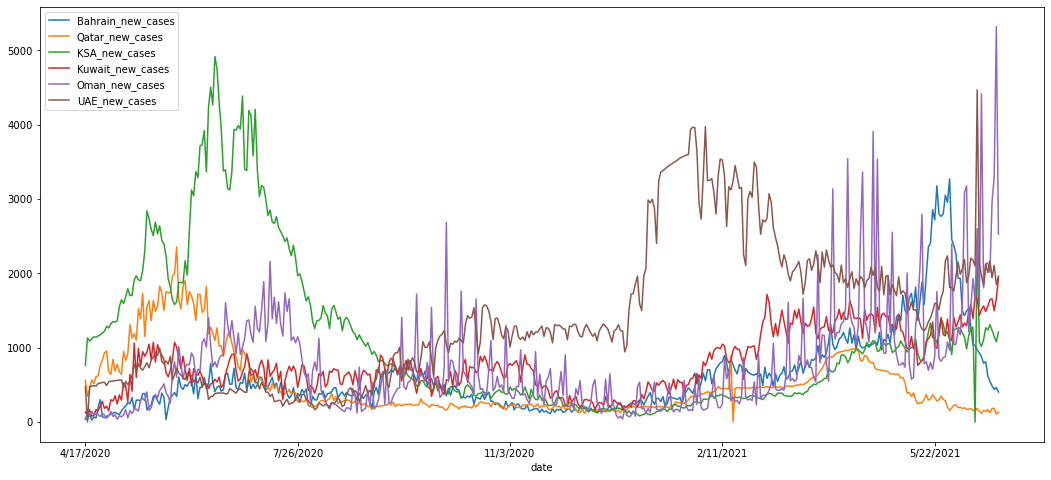

In [59]:
df[["Bahrain_new_cases","Qatar_new_cases","KSA_new_cases","Kuwait_new_cases","Oman_new_cases","UAE_new_cases"]].plot(figsize=(18,8))

In [65]:
train_dates=pd.to_datetime(df['date'])

In [60]:
UAECOVID=df[["UAE_new_cases","UAE_Mean_Temp","UAE_Mean_Dewpoint","UAE_Mean_Windspeed"]]
UAECOVID.shape

(431, 5)

In [123]:
scalarUAECOVID=MinMaxScaler()
scalarUAECOVID.fit(UAECOVID)
normalizedUAECOVID=scalarUAECOVID.transform(UAECOVID)

print(type(normalizedUAECOVID[6][0]))
print(normalizedUAECOVID[0][0],normalizedUAECOVID[0][1],normalizedUAECOVID[1][0],normalizedUAECOVID[1][1])

<class 'numpy.float64'>
0.10668754193692685 0.30434782608695654 0.0 0.34782608695652173


In [189]:
from numpy import hstack
n_input=7
n_output=1
casesUAE=[]
UAEtemp=[]
UAEdew=[]
UAEwind=[]
number=normalizedUAECOVID.shape[0]
print(number)
print(type(normalizedUAECOVID))
targetUAE=[]
targetCases=normalizedUAECOVID[:,0]
for i in range(0,number):
    casesUAE.append(normalizedUAECOVID[i][0])
    UAEtemp.append(normalizedUAECOVID[i][1])
    UAEdew.append(normalizedUAECOVID[i][2])
    UAEwind.append(normalizedUAECOVID[i][3])

casesUAE=np.array(casesUAE)
UAEtemp=np.array(UAEtemp)
UAEdew=np.array(UAEdew)
UAEwind=np.array(UAEwind)
print(len(casesUAE),len(UAEtemp),len(UAEdew),len(UAEwind))
casesUAE=casesUAE.reshape(len(casesUAE),1)
UAEtemp=UAEtemp.reshape(len(UAEtemp),1)
UAEdew=UAEdew.reshape(len(UAEdew),1)
UAEwind=UAEwind.reshape(len(UAEwind),1)
print(casesUAE.shape)
datasetUAE=hstack((casesUAE,UAEtemp,UAEdew,UAEwind))
print(datasetUAE.shape)
generatorUAE=TimeseriesGenerator(datasetUAE,targetCases,length=n_input,batch_size=1)
print(generatorUAE[1])

431
<class 'numpy.ndarray'>
431 431 431 431
(431, 1)
(431, 4)
(array([[[0.        , 0.34782609, 0.75757576, 0.67924528],
        [0.10713487, 0.52173913, 0.37878788, 0.50943396],
        [0.10825319, 0.56521739, 0.33333333, 0.52830189],
        [0.10959517, 0.47826087, 0.45454545, 0.58490566],
        [0.10802952, 0.47826087, 0.5       , 0.58490566],
        [0.11585775, 0.47826087, 0.43939394, 0.54716981],
        [0.1174234 , 0.56521739, 0.31818182, 0.50943396]]]), array([0.11898904]))


In [190]:
dataUAE=[]
targetUAE=[]
for i in range(len(generatorUAE)):
    data1,target1=generatorUAE[i]
    dataUAE.append(data1[0,:,:])
    xx=float(target1)
    targetUAE.append(xx)
dataUAE=np.array(dataUAE)
targetUAE=np.array(targetUAE)
print(type(dataUAE))
print(dataUAE.shape)
print(targetUAE.shape)
x_train_UAE,x_test_UAE,y_train_UAE,y_test_UAE=train_test_split(dataUAE,targetUAE,test_size=0.2,random_state=4)
print(type(dataUAE))
print(x_train_UAE.shape)

<class 'numpy.ndarray'>
(424, 7, 4)
(424,)
<class 'numpy.ndarray'>
(339, 7, 4)


In [195]:
model=Sequential()
model.add(LSTM((1),input_shape=(x_train_UAE.shape[1],x_train_UAE.shape[2]),return_sequences=True))
model.add(LSTM((1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 7, 1)              24        
_________________________________________________________________
lstm_24 (LSTM)               (None, 7, 1)              12        
_________________________________________________________________
lstm_25 (LSTM)               (None, 1)                 12        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [196]:
history=model.fit(x_train_UAE, y_train_UAE, epochs=400, validation_data=(x_test_UAE,y_test_UAE))

Epoch 1/400
11/11 [==============================] - 8s 118ms/step - loss: 0.3141 - accuracy: 0.0000e+00 - val_loss: 0.2998 - val_accuracy: 0.0000e+00
Epoch 2/400
11/11 [==============================] - 0s 10ms/step - loss: 0.3120 - accuracy: 0.0000e+00 - val_loss: 0.2846 - val_accuracy: 0.0000e+00
Epoch 3/400
11/11 [==============================] - 0s 10ms/step - loss: 0.2770 - accuracy: 0.0000e+00 - val_loss: 0.2676 - val_accuracy: 0.0000e+00
Epoch 4/400
11/11 [==============================] - 0s 10ms/step - loss: 0.2637 - accuracy: 0.0000e+00 - val_loss: 0.2505 - val_accuracy: 0.0000e+00
Epoch 5/400
11/11 [==============================] - 0s 10ms/step - loss: 0.2419 - accuracy: 0.0000e+00 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 6/400
11/11 [==============================] - 0s 10ms/step - loss: 0.2215 - accuracy: 0.0000e+00 - val_loss: 0.2185 - val_accuracy: 0.0000e+00
Epoch 7/400
11/11 [==============================] - 0s 10ms/step - loss: 0.2223 - accuracy: 0.0000

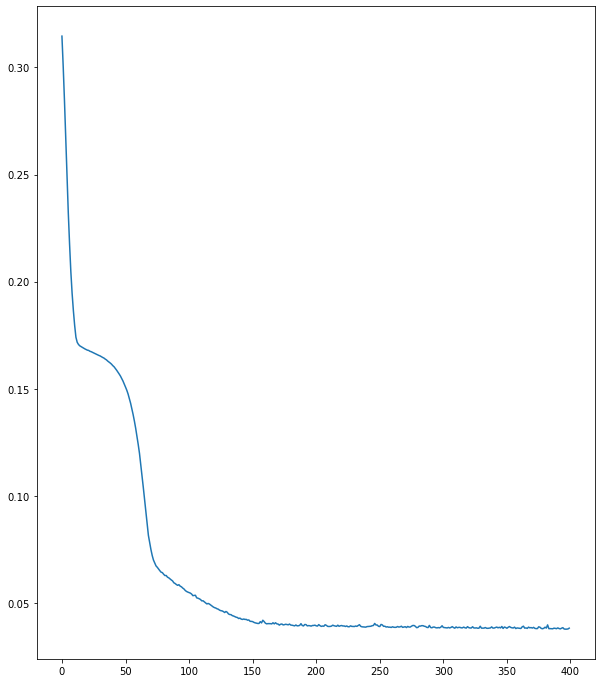

In [197]:
plt.plot(history.history['loss'])
plt.show()

85


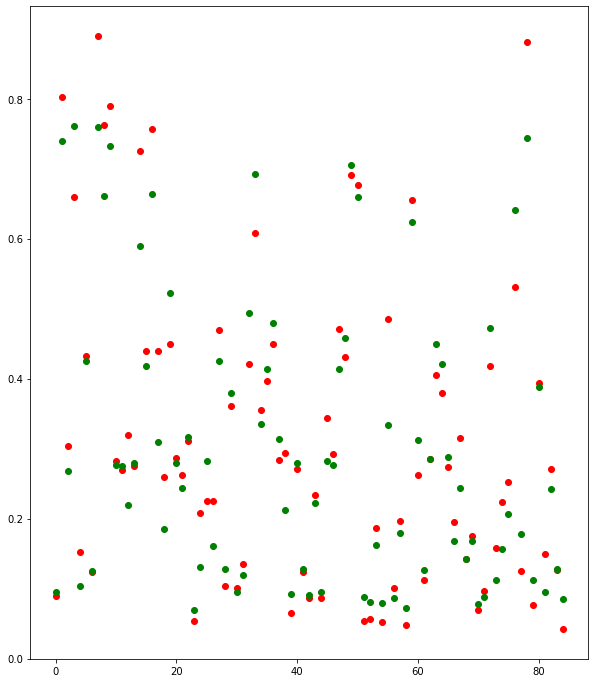

(85, 1)


In [198]:
results_UAE=model.predict(x_test_UAE)
print(len(results_UAE))

plt.scatter(range(len(y_test_UAE)),y_test_UAE,c='r')
plt.scatter(range(len(results_UAE)), results_UAE, c='g')
plt.show()
print(results_UAE.shape)

In [230]:

print(resultsNotScaledUAE.shape)
print(targetNotScaledUAE.shape)




(17, 5)
(17, 5)


[[0.09528295 0.73959416 0.26781145 0.7618031  0.1033308 ]
 [0.42554638 0.12494112 0.7594046  0.66150135 0.7327041 ]
 [0.27641082 0.27561527 0.21986285 0.2794105  0.59018815]
 [0.41793627 0.6635487  0.30998105 0.18537985 0.52255267]
 [0.27948713 0.2432782  0.31657737 0.06917372 0.13086607]
 [0.28181264 0.16162631 0.42568225 0.1285617  0.379596  ]
 [0.09563928 0.11975589 0.49371693 0.69190484 0.3348725 ]
 [0.41336134 0.4802911  0.313889   0.2127919  0.09275398]
 [0.27991557 0.12849702 0.09093535 0.22317727 0.09598837]
 [0.2827405  0.27729806 0.41410288 0.45763418 0.7058129 ]
 [0.66031647 0.08803982 0.08090493 0.16266716 0.08009817]
 [0.33435798 0.08659047 0.17997845 0.0720043  0.6242673 ]
 [0.31198663 0.12629531 0.28593296 0.4501122  0.4210033 ]
 [0.2882418  0.16804537 0.2441143  0.14182241 0.16750996]
 [0.07843383 0.08829836 0.4729281  0.11309545 0.15745841]
 [0.2066091  0.640516   0.17757873 0.7435068  0.11246752]
 [0.38887593 0.09479608 0.24224071 0.12762304 0.08508925]]
<class 'numpy

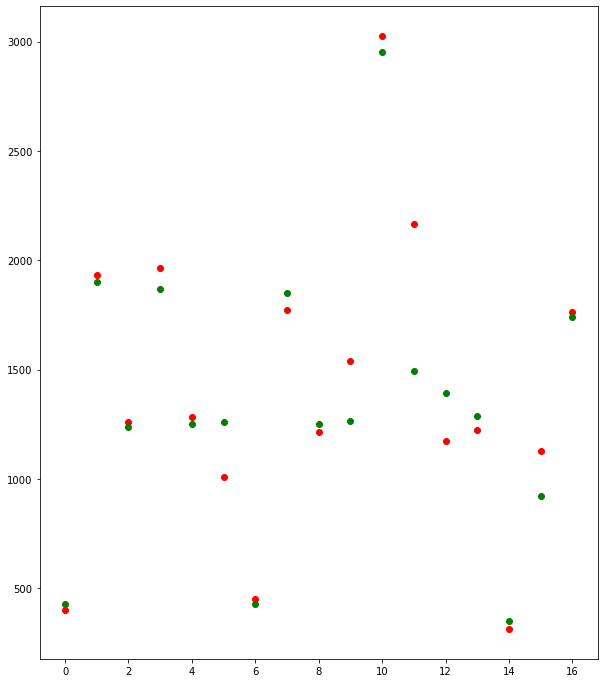

In [247]:
results_UAE2=results_UAE.reshape(-1,5)
forecast_copies=np.repeat(results_UAE2,1,axis=-1)
print(forecast_copies)
resultsNotScaledUAE=scalarUAECOVID.inverse_transform(forecast_copies)
print(type(resultsNotScaledUAE))
resultsNotScaled=resultsNotScaledUAE[:,0]


y_test2_UAE=y_test_UAE.reshape(-1,5)
y_test2_UAE=np.repeat(y_test2_UAE,1,axis=-1)
targetNotScaledUAE=scalarUAECOVID.inverse_transform(y_test2_UAE)
targetNotScaled=targetNotScaledUAE[:,0]


plt.scatter(range(len(targetNotScaledUAE)),targetNotScaled,c='r')
plt.scatter(range(len(resultsNotScaledUAE)),resultsNotScaled,c='g')
plt.show()

In [248]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_UAE,y_test_UAE))
print(rmse)
rmse=sqrt(mean_squared_error(resultsNotScaledUAE, targetNotScaledUAE))
print(rmse)

0.05465288967408502
91.62995128839576
